In [37]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [38]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNEL=3
EPOCHS=50

In [39]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",
                                                    shuffle=True,
                                                    image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE
                                                   )

Found 2152 files belonging to 3 classes.


In [40]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [41]:
len(dataset)


68

In [42]:
68*32

2176

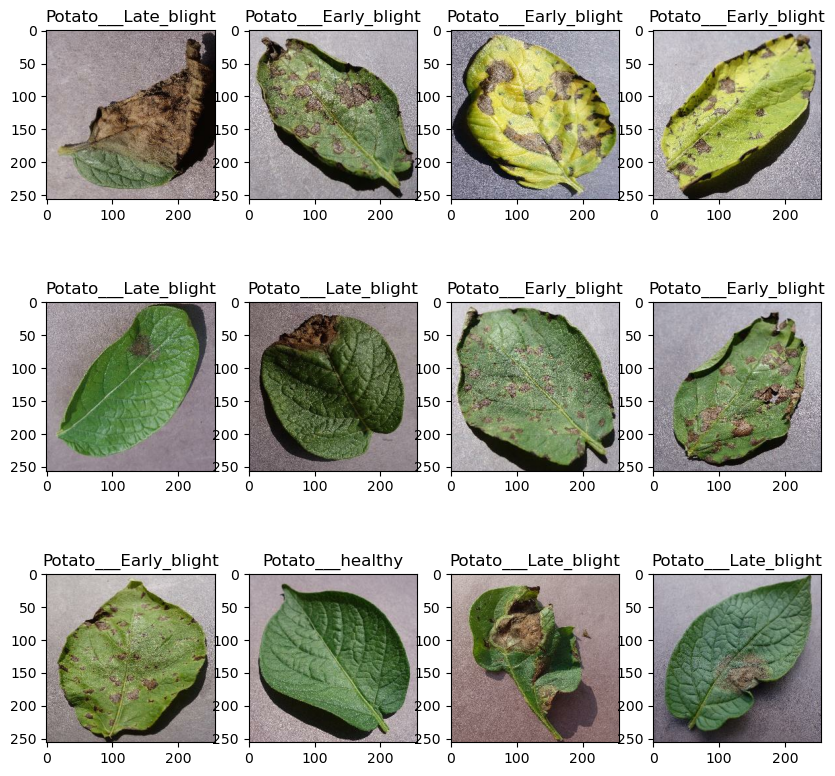

In [43]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))

        plt.title(class_names[label_batch[i]])
    

In [44]:
len(dataset)

68

In [45]:
80% ===> training
20% ===> 10% ===> validation , 10% ===> test

SyntaxError: invalid syntax (912259477.py, line 1)

In [46]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [47]:
train_ds=dataset.take(54)
len(train_ds)

54

In [48]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [79]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [80]:
val_ds=test_ds.take(6)
len(val_ds)

0

In [81]:
test_ds=test_ds.skip(6)
len(test_ds)

0

In [82]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size=len(ds)
    
    
    
    
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_size*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [73]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

UnboundLocalError: cannot access local variable 'val_size' where it is not associated with a value

In [83]:
len(dataset)

68

In [84]:
len(train_ds)

54

In [85]:
len(val_ds)

0

In [86]:
len(test_ds)

0

In [87]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [94]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])


In [95]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [104]:
input_shape =(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [105]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_20 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [111]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [112]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 34s 586ms/step - loss: 0.7997 - accuracy: 0.6528
Epoch 2/50
54/54 [==============================] - 31s 571ms/step - loss: 0.4731 - accuracy: 0.8362
Epoch 3/50
54/54 [==============================] - 31s 579ms/step - loss: 0.3957 - accuracy: 0.8565
Epoch 4/50
54/54 [==============================] - 35s 649ms/step - loss: 0.3816 - accuracy: 0.8438
Epoch 5/50
54/54 [==============================] - 34s 631ms/step - loss: 0.2964 - accuracy: 0.8623
Epoch 6/50
54/54 [==============================] - 32s 602ms/step - loss: 0.2756 - accuracy: 0.8733
Epoch 7/50
54/54 [==============================] - 32s 598ms/step - loss: 0.2358 - accuracy: 0.9039
Epoch 8/50
54/54 [==============================] - 34s 636ms/step - loss: 0.1935 - accuracy: 0.9306
Epoch 9/50
54/54 [==============================] - 34s 626ms/step - loss: 0.2256 - accuracy: 0.9242
Epoch 10/50
54/54 [==============================] - 35s 645ms/step - loss: 0.1367 - accura